![title](img/picture.png)

# Predicting Length of Stays for ER Visits Project

____________________________________

## 1. Background

### Purpose

__Length of Stay (LOS)__ is a key metric used by healthcare facilities to measure general efficiency of a facility and also provides logistical information reflecting specific medical facility capacities. __Length of Stay (LOS)__ is defined as the time between a patient admission and discharge from a particular hospital. Test data may be obtained via microsoft and is available on such popular data science platforms as `Kaggle`. The data for project was analyzed with Python `Scikit-Learn` for general patterns and a regression model was created using numerous patient and healthcare attributes to predict the length of stay per each patient.

### Methodology

Three different model types are tested against each other to determine which model produces the best predictionsusing the Python machine learning library `Scikit Learn`.
<br><br>
| Model    | Method | Pros   | Cons|
| ------- | --- | ------- | --- |
| Linear Regression  | Linear (OLS)  |Fast,    | May Underfit |
| Random Forest   | Non-Parametric | Intuitive, Powerful | Slow, May Overfit |
| Support Vector Machines    | Non-Parametric; Linear Algebraic | Great Accuracy, High Dimensional   | Somewhat Slow |

<br><br>
The major comparitors between each type of model are:
1. Performance Considerations: (Does the model provide feasibility for companies to run on large scale platforms?)
2. Generalization Errors: (How well the model performs in training vs. real-world data?)
3. Intuition: (How easy is the model to explain to stakeholders?)
<br><br>
These questions are answered in the summary after the analysis. Do note a brief data exploration is provided prior to model training simply to observe the association between each feature with the outcome variable 'Length of Stay'.

____________________________________

## 2. Data Wrangling

Steps are taken to obtain the data from the raw flat file and to examine the data prior to performing any analysis or transformations.

### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import sklearn
import scipy 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Utility Functions

Track the parent location of this notebook.

In [20]:
parent = os.getcwd().replace('\\notebooks','')
parent

'D:\\Projects\\Predicting Length of Stays for ER Visits'

Function that saves images to specific directory for reporting.

In [22]:
# Function saves images to folder
IMAGES_PATH = parent + '\\images'
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Throughout the analysis, quick quality control checks are simply performed using the following function.

In [24]:
def qc(X):
    shape = X.shape
    missing = X.isnull().sum()
    return shape, missing

### Download Data

In [26]:
raw_data = pd.read_csv(parent + '\\data\\raw data.csv')
raw_data.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


### Column Info

In rare fashion, this data contains all values with the outcome variable __'lengthofstay'__ located as the last column.

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

### Describe Data

In [31]:
raw_data.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


### Visualize Data

Below, we can see that most of the numeric data is representative by classic Gaussian curves minus the outcome __'lengthofstay'__ that appears left skewed. Furthermore, we found that the categorical data columns are represented by indicator variables as 0 for no and 1 for yes. Many of the categorical variables are imbalanced so it will be imperative to ensure proper proportions between training and testing data.

Saving figure attribute_histogram_plots


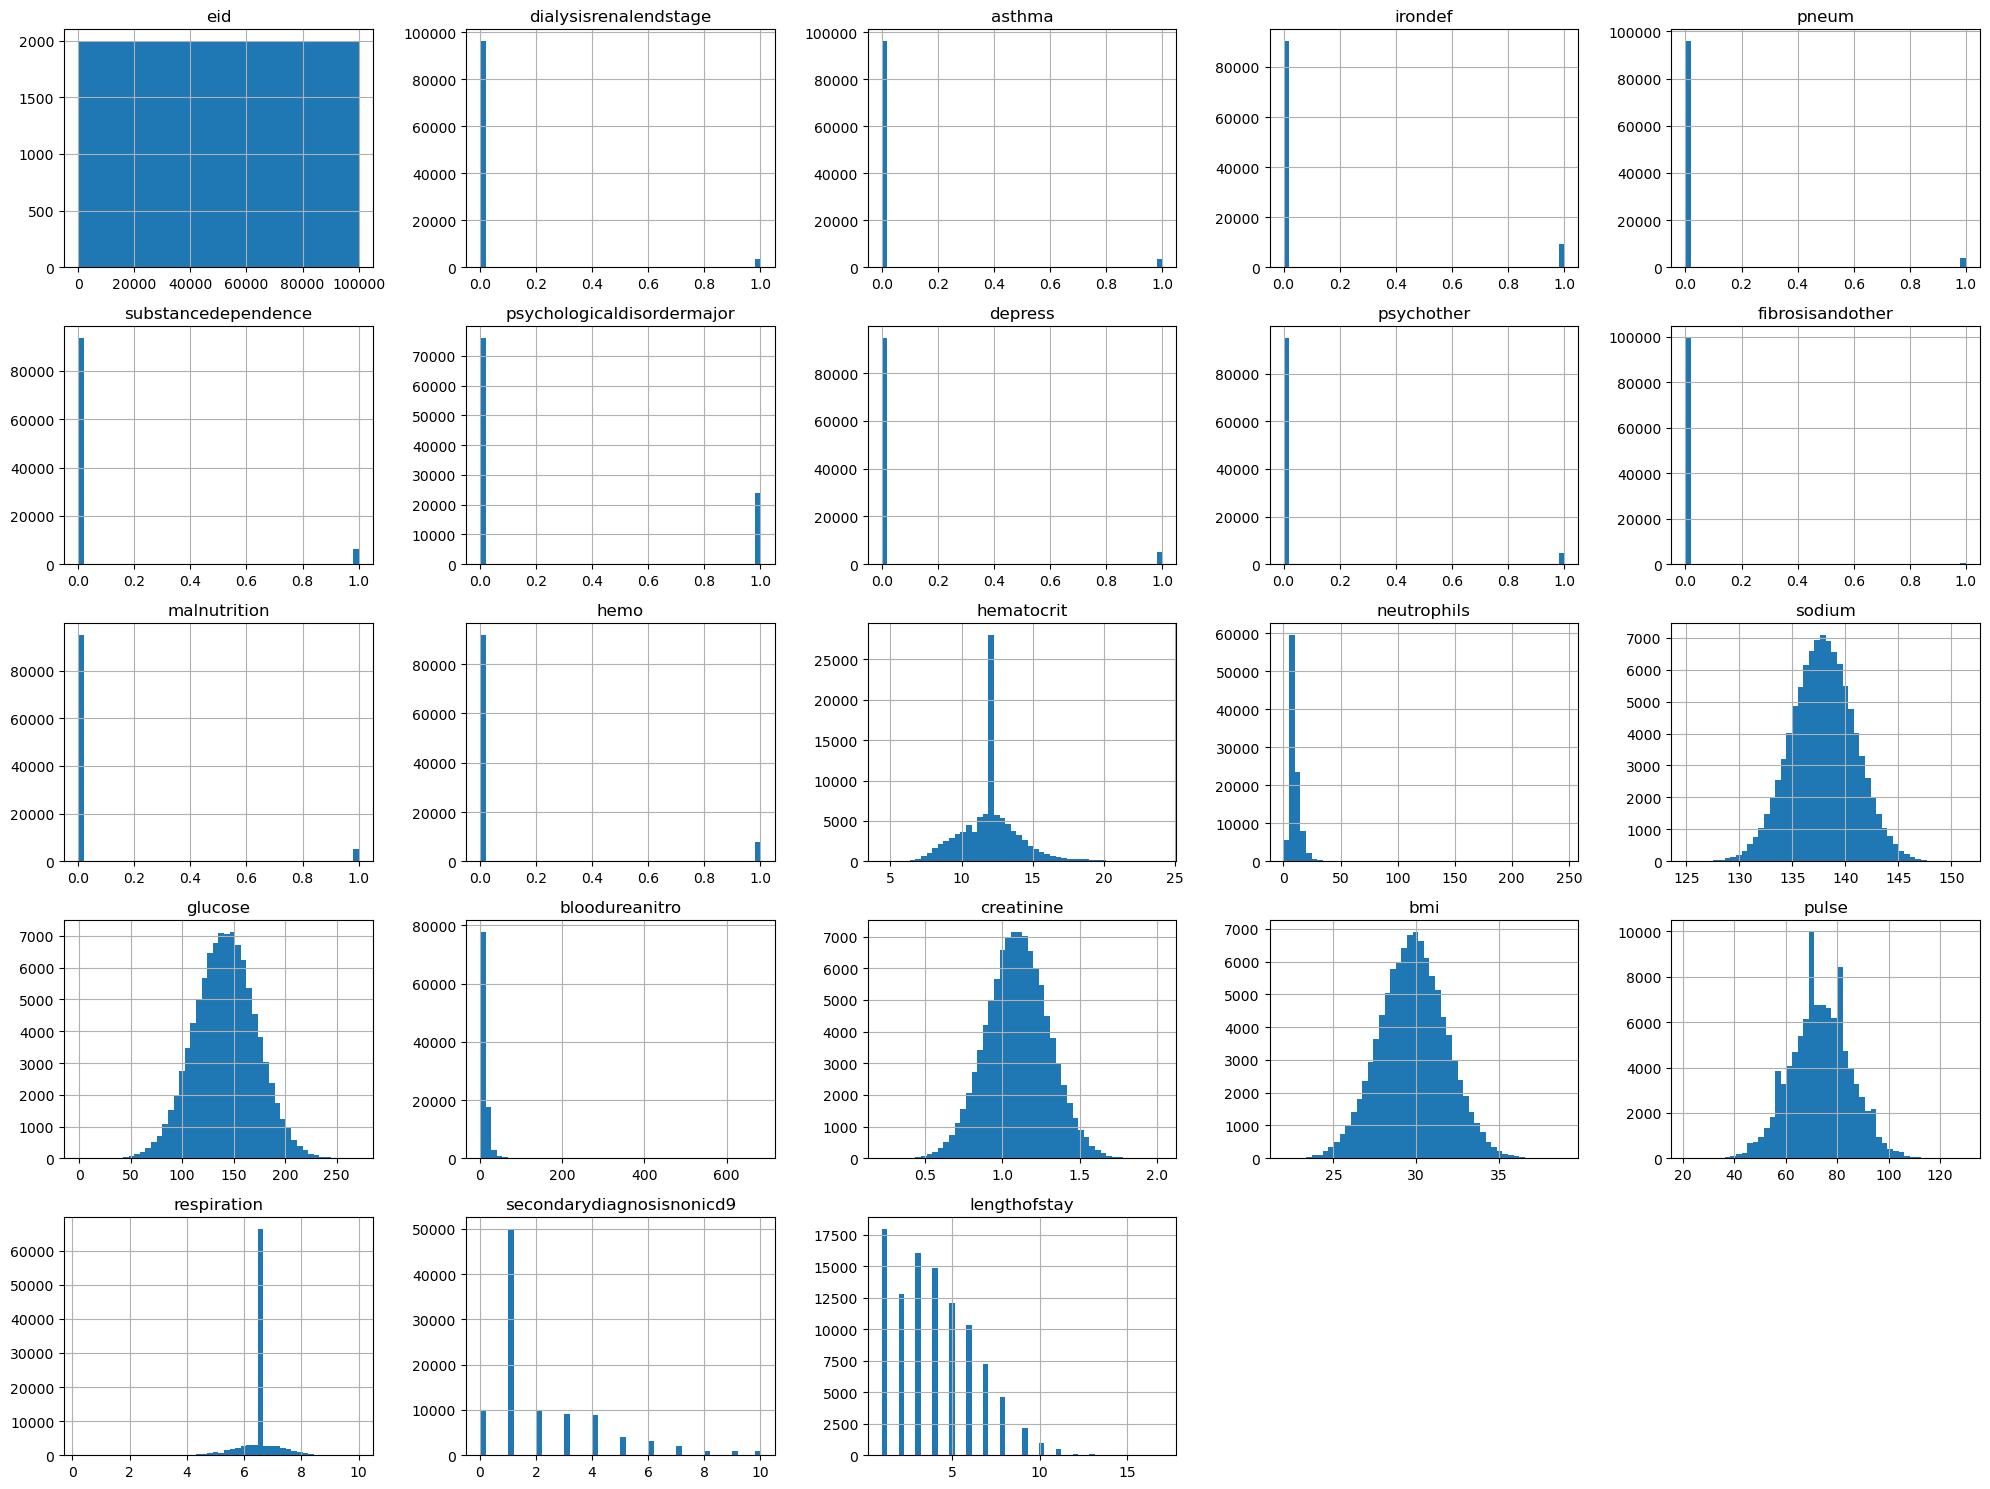

In [34]:
raw_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### Data Anomalies

Typically, if any of the following discrepancies listed below were present, Pandas or Sklearn functions may be used to resolve each issue. For documentation purpose, each class method is listed alongside each anomaly.

#### Missing Values

In [38]:
raw_data.isnull().sum()

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

Machine learning algorithms will physically not be able to train with missing values present. Luckily, this data has all values, but for documentation methods are included.

#### Outliers

Outliers may influence machine learning algorithms by overfitting the data so that when the trained data is tested with test data it may have poor performance. 
Outliers may be detected via:
1. Noting values of a specific standard deviation (ie. 95% or 2 SDs)
2. Noting values 1.5 times outside of the first and third quartiles
3. Using machine learning algorithms used for detection of outliers such as Support Vector Machines or Isolation Forest

After viewing the histograms above, are data looks pretty outlier free; however, just for praticality the creatinine column is check for outliers using +/- 2SD range. The use of standard devation has been choosen since the data appears fairly normalize. We note below that 95.39 % of data is within +/- 2SD which notes this data follows proportions described by normalized data.

In [43]:
print(len(raw_data['creatinine']
[
(raw_data['creatinine'] < (raw_data['creatinine'].mean() + (raw_data['creatinine'].std()*2)))
& (raw_data['creatinine'] > (raw_data['creatinine'].mean() - (raw_data['creatinine'].std()*2)))
])/len(raw_data['creatinine']) * 100, "% within range")

95.39 % within range


The removal of outliers should also be a decision based on conceptuality of each feature. In the case above, it actual __DOES NOT__ make sense to remove the outliers of the creatinine values. For this specific project, we want __TO KEEP__ abnormal values as they indicate possible disease states present that may effect length of stay of patients. It is imperative to consult subject matter experts on data removal in such cases.

____________________________________

## 3. Data Exploration

### Categorical vs Numeric Columns

Data exploration is highly dependent on the data types of each of the columns where particular columns are categorical and others numeric in nature.

In [49]:
num_cols = []
cat_cols = []
for col in raw_data.columns:
    if raw_data[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)
raw_numeric = raw_data[num_cols]
raw_cat = raw_data[cat_cols]

### Testing for Normality

Both the __Support Vector Machines Regression__ and __Random Forest Regression__ are non-parametric in nature and do not have any assumptions for normality for the input or output. __Linear Regression__ in itself only requires the errors to be normally distributed which may be performed in the Model training section. For reference the kstest is excellent for testin normality of data.

In [52]:
#from scipy.stats import kstest
#perform Kolmogorov-Smirnov test for normality
#kstest(data, 'norm')

### Remove Outcome Variable

It will be imperative to compare columns or features to the actual outcome to see what columns should be used in the models.

In [55]:
raw_numeric = raw_numeric.drop('lengthofstay', axis=1)
outcome = raw_data[['lengthofstay']]

#### A Look at the Outcome...

Typically, the lengthof stay given in days is around 4 days per each patient. We will want a model that will be able to predict closely to this value based on the inputs that we provide.

In [217]:
print(outcome.describe())
print(outcome.median())

       lengthofstay
count  100000.00000
mean        4.00103
std         2.36031
min         1.00000
25%         2.00000
50%         4.00000
75%         6.00000
max        17.00000
lengthofstay    4.0
dtype: float64


### Correlations

Associations between the input variables and outcome may be measured for numerical data using __Pearson's correlation coefficient__. Associations do not indicate association, but certain note interactions between variables. 

Saving figure correlation


<Axes: >

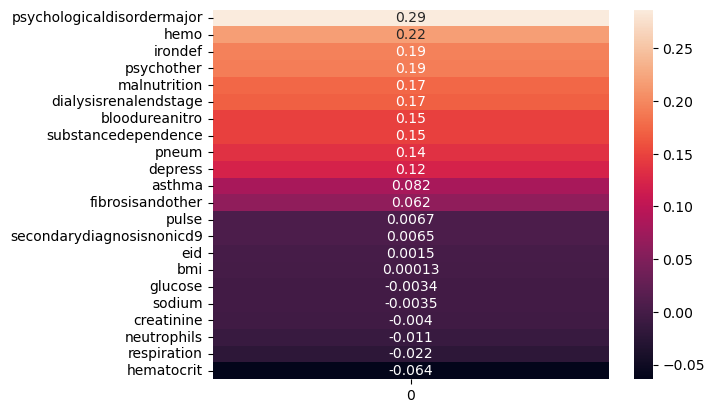

In [244]:
corr_numeric = raw_numeric.corrwith(outcome['lengthofstay']).sort_values(ascending=False)
save_fig("correlation")
sns.heatmap(corr_numeric.to_frame(),annot=True)

### Feature Selection

Feature Selection may be obtained inherently by using Sklearn 'Best Estimators' method after training the models. However, there does appear to some features such columns simply representing IDs that may be removed. It is worth noting that some features may not correlate well on their own; however, in conjunction with other features may prove valuable.  

In [61]:
# these columns are intentionally drop as they add no value to our model
raw_data_copy = raw_data.copy()
raw_data = raw_data.drop(['eid','vdate','rcount','gender','discharged','facid','secondarydiagnosisnonicd9'], axis=1)

## 4. Model Training

### Create Test Set

A test set will be obtained by procuring 20% of the data and test values will not be used or seen until testing!

In [65]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)

### Separate Input and Output Variables

#### Training Set

In [68]:
X = train_set.loc[:, train_set.columns != 'lengthofstay']
y = train_set.loc[:, 'lengthofstay']

#### Testing Set

In [70]:
X_test = test_set.loc[:, train_set.columns != 'lengthofstay']
y_test = test_set.loc[:, 'lengthofstay']

### Preprocessing

#### Create Categorical and Numerical Training Sets

All of the categorical columns have a maximum value of 1. Perhaps, a more astute way of testing this is test if each column only has two unique value sets (0 or 1).

In [74]:
# create a list of categorical columns where max value is 1
cats = []
for cols in X:
    if X[cols].max() == 1:
        cats.append(cols)
cats        

['dialysisrenalendstage',
 'asthma',
 'irondef',
 'pneum',
 'substancedependence',
 'psychologicaldisordermajor',
 'depress',
 'psychother',
 'fibrosisandother',
 'malnutrition',
 'hemo']

##### Categorical

No further processing is needed since client stores values as 0 and 1.

In [77]:
X_cat = X.loc[:,cats]
X_cat.head()

,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo
75220,0,0,0,0,0,0,0,0,0,0,0
48955,0,0,0,0,0,0,0,0,0,0,0
44966,0,0,0,0,0,0,0,0,0,0,0
13568,0,0,0,0,0,1,0,0,0,0,0
92727,0,0,0,0,0,0,0,0,0,0,0


In [78]:
X_cat.shape

(80000, 11)

##### Numerical

In [80]:
X_num = X.drop(cats,axis=1)
X_num.head()

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration
75220,12.5,14.2,139.144523,194.918958,12.0,1.162631,30.813324,72,6.5
48955,13.0,8.0,135.986192,159.994508,13.0,0.931362,28.777008,77,7.7
44966,10.9,16.1,140.209158,143.880164,8.0,1.191925,29.199398,62,6.5
13568,13.7,10.9,133.763887,172.832680,29.0,1.366344,30.367111,64,6.5
92727,12.2,6.3,140.224606,144.676235,13.0,0.867665,28.706147,68,6.5


In [81]:
X_num.shape

(80000, 9)

#### One Hot Encoding

Machine learning algorithms do not work on categorical data, this data must be converted to a numeric form. Categorical data instances are subdivided into their own columns where presence of the feature is represented by 1 and absence as a 0. For example, are gender column contains male and female legal sex contained as instances within one column in the raw data. However, in the processed data below, each instance will be converted into a column (male column, female column).

#### Scaling

Scaling the data is imperative to training the model as each feature will be on the same _playing field_ as values in each feature are all scaled using standardization. Standardization allows the standard deviation to be subtract from each value then divided by mean.

In [86]:
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler()
X_num_scaler = num_scaler.fit_transform(X_num)
X_num_scaler.shape
# Use     num_scaler.inverse_transform(X_num_scaler)      to  reobtain orginal values!!!

(80000, 9)

#### Recombined the Processed Categorical and Numerical Training Data

When recombining the categorical and numerical data sets, it is imperative to reset the index on the categorical data set since it will have the original indices. The numerical data set indices were naturally removed after converted the numerical data set to a numpy array during the Scaling process. When re-creating the numerical data frame, the indices are reset to 0 by default, but the categorical data set will have the indices created randomly during the train_test_split functioning!!!
<br><br>
The purpose of creating a data frame is simply to be able to save the processed data itself as a .csv file and I perfer `Pandas` over `Numpy` for any last minute functioning that might be needed.

In [89]:
X_num_scaler_df = pd.DataFrame(X_num_scaler,columns=X_num.columns)
X_processed = pd.concat([X_num_scaler_df, X_cat.reset_index(drop=True)], axis=1)
X_processed.head()

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo
0,0.255949,0.781822,0.419419,1.762705,-0.160499,0.315837,0.502160,-0.124876,0.014293,0,0,0,0,0,0,0,0,0,0,0
1,0.501588,-0.423052,-0.633077,0.600092,-0.084290,-0.838849,-0.513493,0.303876,2.123556,0,0,0,0,0,0,0,0,0,0,0
2,-0.530094,1.151057,0.774203,0.063656,-0.465337,0.462097,-0.302818,-0.982381,0.014293,0,0,0,0,0,0,0,0,0,0,0
3,0.845482,0.140518,-1.373647,1.027467,1.135060,1.332938,0.279603,-0.810880,0.014293,0,0,0,0,0,1,0,0,0,0,0
4,0.108566,-0.753420,0.779351,0.090157,-0.084290,-1.156876,-0.548837,-0.467878,0.014293,0,0,0,0,0,0,0,0,0,0,0


#### Rows - Columns  - Missing Values - Final Check!!

Looks good!

In [92]:
qc(X_processed)

((80000, 20),
 hematocrit                    0
 neutrophils                   0
 sodium                        0
 glucose                       0
 bloodureanitro                0
 creatinine                    0
 bmi                           0
 pulse                         0
 respiration                   0
 dialysisrenalendstage         0
 asthma                        0
 irondef                       0
 pneum                         0
 substancedependence           0
 psychologicaldisordermajor    0
 depress                       0
 psychother                    0
 fibrosisandother              0
 malnutrition                  0
 hemo                          0
 dtype: int64)

##### Save a copy of the processed data

In [94]:
X_processed.to_csv('D:\Projects\Predicting Length of Stays for ER Visits\data\processed_data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\rcbre\AppData\Local\Temp\ipykernel_10092\1900706162.py:1: SyntaxWarning: invalid escape sequence '\P'
  X_processed.to_csv('D:\Projects\Predicting Length of Stays for ER Visits\data\processed_data.csv')


#### Create an ETL Function for Preprocessing

Note, the following steps taken above were performed indvidually for demonstration purposes. However, the more efficient method of performing the preprocessing step for future use is to simply create a Python function.

In [97]:
# Function to perform preprocessing
def preprocess(X):
    cats_ = []
    for cols in X_:
        if X_[cols].max() == 1:
            cats.append(cols) 
    # create categorical and numerical dfs
    X_cat_ = X.loc[:,cats_]
    X_num_ = X.drop(cats_,axis=1)
    
    # scale numerical df
    from sklearn.preprocessing import StandardScaler
    num_scaler_ = StandardScaler()
    X_num_scaler_ = num_scaler_.fit_transform(X_num_)
    
    # combined scaled numerical df and X_cat
    X_num_scaler_df_ = pd.DataFrame(X_num_scaler_,columns=X_num_.columns)
    X_processed_= pd.concat([X_num_scaler_df_, X_cat_.reset_index(drop=True)], axis=1)
    return X_processed_

### Traning each Model

#### Linear Regression

__Linear regression__ creates a linear equation using the classic __Y=β0+β1X+ε__ equation where  β (beta) serves as weights and ε (epsilon) as an error term to allow for predictions Y. The main idea, to reduce the errors, or distances of the data to the model (line) as a collective group (considering all data points). 

__Linear Regression__ modeling requires certain assumptions to be met.
<br><br>
__Assumptions:__
<br><br>
1. Linearity: The relationship between the dependent and independent variables is linear.
2. Independence: The observations are independent of each other.
3. Homoscedasticity: The variance of the errors is constant across all levels of the independent variables. __(for the errors only!!)__
4. Normality: The errors follow a normal distribution. __(for the errors only!!)__
5. No multicollinearity in the data.
<br><br>
We will verify the assumptions using residual plots, qq plots, and plotting the linear regression line itself!

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_processed, y)

LinearRegression()

#### Random Forest Regression

__Random Forest__ is a non-parametric test that is ultra dynamic in that no apparent assumptions are needed, data does not have to be scaled, or encoded.The algorithm works by creating a multitude of decision trees and selecting the majority output amongst all decision trees (voting). Each Decision Tree divides samples into groups in a binary fashion based thresholds (a set value) within the features that provides optimal cost function (ie. mean squared error). 

In [105]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X, y)

RandomForestRegressor(random_state=42)

Add description...

#### Support Vector Machines - Regression

__Support Vector Machines__ work by creating measuring distances from boundaries between instances in the data. Ideally using the crude diagram below (I am not an artist), the slack should be optimally reduced , but with the tradeoff of providing the smallest distance for Epsilon. The idea is that a 'tighter' epsilon will provide a more precise model; however, by also considering slack we essentially allow for more generalizability for real-world data that may not fit so tightly as the training data does within epsilon. 

![title](img/svr.png)

In [110]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR()
svm_reg.fit(X_processed, y)

D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR()

## 5. Model Validation

`Sklearn` provides a robust method to test error in each model by allowing multiple randomize subsets of data to be compared in the error functions (mean squared error). Note, `Sklearn` by default using negative scoring for all of its scoring formula; hence, why you will see the "negative mean squared error" below. This may simply be multiplied by -1.  A list of all `Sklearn` cost functions is provided below:
<br><Br>
https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

#### Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_processed, y,
                         scoring="neg_mean_squared_error", cv=10)
print("10 cross-validation scores: ", -scores, " \nAverage Score: ",-scores.mean())

10 cross-validation scores:  [4.55750566 4.45456418 4.63652852 4.55534412 4.44654548 4.58699079
 4.4875319  4.62345726 4.47317287 4.79414826]  
Average Score:  4.561578904387079


#### Random Forest Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [118]:
from sklearn.model_selection import cross_val_score
# Again - no feature scaling in Random Forest so we may use unprocessed data!
scores = cross_val_score(forest_reg, X, y,
                         scoring="neg_mean_squared_error", cv=10)
print("10 cross-validation scores: ", -scores, " \nAverage Score: ",-scores.mean())

10 cross-validation scores:  [3.79250348 3.72884962 3.85434856 3.73051891 3.71377284 3.77326164
 3.77344114 3.84054738 3.73052264 3.86235299]  
Average Score:  3.78001191875


#### Support Vector Machines Regression

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [121]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_reg, X_processed, y,
                         scoring="neg_mean_squared_error", cv=10)
print("10 cross-validation scores: ", -scores, " \nAverage Score: ",-scores.mean())

D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to

10 cross-validation scores:  [4.79211881 4.72367224 4.98232778 4.91451741 4.76508247 4.82260035
 4.78673543 4.96676451 4.73845425 5.16923478]  
Average Score:  4.86615080369584


____________________________________

So far the __Random Forest Regressor__ appears to have the best scores; however, we still have two major steps to perform:
1. Tweaking any of the model parameters to further improve error scoring
2. Comparing the Training vs. Testing error scoring to test for _Generalization Error_

____________________________________

## 6. Model Enhancement

### Manually Selected Hyperparameter Tuning (GridSearchCV)

Each of the models have hyperparameters that may be adjusted so that the error scoring may be further improved. The hyperparameters are specific to each algorithm and using `Sklearn` __GridSearchCV__, one may include a list of values per each model's hyperparamter that will be tested using a scoring metric. The process is semi-autonomous as we must rerun GridSearchCV using narrowed down list of values based on the previous __GridSearchCV__. The process continues in an interative fashion until the scoring metric plateaus. Another option is to use `Sklearn` __RandomziedSearchCV__; however, this more autonomous process takes quite awhile especially with __Random Forest__ algorithms involved.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [128]:
from sklearn.model_selection import RandomizedSearchCV 

### Linear Regression

Unfortunately, we have reached the end of the road with linear regression model tuning as there are truly no hyperparameters in the model to tune. If _generalization error_ is truly bad, as we will see in the __Validation Section__, then we may perform __Regularization__ by adding a penality to the __cost function__ used to train the model such as a __L1 Norm__ or __L2 Norm__. 

#### Optimal Support Vector Machine Regression Model

In [162]:
optimal_lr = lin_reg

### Random Forest Regression Hyperparameter Tuning

The following table list common hyperparamters that may be adjusted to obtain the optimal error scoring. The defaults are listed in the Sklean API:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

| Hyperparamter   | Role | Increasing hyperparamter... |
| ------- | --- | ------- |
|__n_estimators__|number of trees|increases overfitting|
|__max_depth__|maximum depth of the tree|increases overfitting|
|__min_samples_split__|minimum number of samples required to split an internal node|decreases overfitting|
|__min_samples_leaf__|minimum number of samples required to be at a leaf node|decreases overfitting|
|__max_features__|number of features to consider when looking for the best split|increases overfitting|
|__max_leaf_nodes__|number of leaf nodes|decreases overfitting|
|__bootstrap__|allow reuse of instances in randomized resampling used by algorithm|decreases overfitting|


#### RandomSearchCV

In [137]:
# Define the hyperparameters and their distributions 
param_distributions = {'max_depth': [2,4,6,8,12,16,20,24,28,32], 
     'n_estimators':[1,100,200,300,400,500,600,700,800,900,1000],
    'max_depth': [1,4,8,12,16,20,24,28,32]}

# Create a model 
forest_reg = RandomForestRegressor(random_state=42)
# Again - no feature scaling in Random Forest so we may use unprocessed data!  
# Use randomized search to find the optimal hyperparameters 
random_search = RandomizedSearchCV(forest_reg, param_distributions) 
random_search.fit(X, y) 
  
# Print the optimal values for the hyperparameters 
print(random_search.best_params_)

{'n_estimators': 400, 'max_depth': 20}


#### Optimal Random Forest Regression Model

In [141]:
optimal_rfr = RandomForestRegressor(random_state=42,
    max_depth = 20,
    n_estimators = 400 ).fit( X, y)

### Support Vector Machine Regression Hyperparameter Tuning

The following table list common hyperparamters that may be adjusted to obtain the optimal error scoring. The defaults are listed in the Sklean API:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

| Hyperparamter   | Role | Increasing hyperparamter... |
| ------- | --- | ------- |
|__C__|number of trees|increases overfitting|
|__epsilon__|width of the margins|decreases overfitting|



#### RandomSearchCV

In [149]:
from sklearn.svm import LinearSVR
# Define the hyperparameters and their distributions 
param_distributions = {'C': [0.01,10,100,1000], 
     'epsilon': [0.5,1.0, 2.0]}
# Create a model 
svm_reg = LinearSVR()
  
# Use randomized search to find the optimal hyperparameters 
random_search = RandomizedSearchCV(svm_reg, param_distributions) 
random_search
  
# Print the optimal values for the hyperparameters 
print(random_search.best_params_) 

D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\CONDA\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\CONDA\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\CONDA\Lib\site-packages\skle

{'epsilon': 2.0, 'C': 0.01}


#### Optimal Support Vector Machine Regression Model

In [177]:
optimal_svr = LinearSVR(epsilon= 2.0, C = 0.01).fit(X_processed, y)

D:\CONDA\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## 7. Model Predictions

The main point of creating models is too allow stakeholders to make predictions. Here, create the pedicted values based on the test set that will be compared to our corresponding labels in the next section __Model Validation__ to test how well the final models generalize.

#### Prior to Fitting the Test Data, We Must Process!

In [165]:
## **** GOAL: Apply transformations to test set ***
#            X_test 
#           y_test 

## IMPORTANT: DOES NOT APPLY TO RANDOM FOREST!!

# create a list of categorical columns where max value is 1
cats = []
for cols in X_test:
    if X_test[cols].max() == 1:
        cats.append(cols)

# create categorical and numerical dfs
X_cat_test = X_test.loc[:,cats]
X_num_test = X_test.drop(cats,axis=1)

# scale numerical df
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler()
X_num_scaler_test = num_scaler.fit_transform(X_num_test)

# combined scaled numerical df and X_cat
X_num_scaler_test_df = pd.DataFrame(X_num_scaler_test,columns=X_num_test.columns)
X_processed_test = pd.concat([X_num_scaler_test_df, X_cat_test.reset_index(drop=True)], axis=1)

__Below, we see that each model comes represents the average Length of Stay outcome variable fairly well. Previously, we describe this number to be around 4 days but with some variance, and the prediction arrays below appear to correspond.__

### Linear Regression Predictive Values (Best Speed)

In [169]:
lr_y_pred = optimal_lr.predict(X_processed_test)
lr_y_pred

array([5.05043268, 3.27452622, 3.35042014, ..., 4.20922685, 4.52182191,
       4.72500475])

### Random Forest Regression Predictive Values (Best Overall)

In [171]:
rfr_y_pred = optimal_rfr.predict(X_test)
rfr_y_pred

array([4.92361531, 2.47638743, 3.32700191, ..., 4.40622966, 6.58004143,
       4.64154704])

### Support Vector Machines Regression Predictive Values (Too Slow!)

In [179]:
svr_y_pred = optimal_svr.predict(X_processed_test)
svr_y_pred

array([5.03316074, 3.01544812, 3.04459313, ..., 4.01294614, 4.81115761,
       4.48453548])

## 8. Model Validation

https://scikit-learn.org/stable/auto_examples/model_selection/plot_train_error_vs_test_error.html

Route 1: Simply calculate the MSE

In [183]:
from sklearn.metrics import mean_squared_error
# GradientBoostingRegressor
lr_mse = mean_squared_error(y_test, lr_y_pred)
print("GradientBoostingRegressor mean squared error (MSE): {:.4f}".format(lr_mse))
# RandomForestRegressor
rfr_mse = mean_squared_error(y_test, rfr_y_pred)
print("RandomForestRegressor mean squared error (MSE): {:.4f}".format(rfr_mse))
# DecisionTreeRegressor
svr_mse = mean_squared_error(y_test, svr_y_pred)
print("DecisionTreeRegressor mean squared error (MSE): {:.4f}".format(svr_mse))

GradientBoostingRegressor mean squared error (MSE): 4.4957
RandomForestRegressor mean squared error (MSE): 3.6333
DecisionTreeRegressor mean squared error (MSE): 4.5978


#### Random Forest Regresion - Root Mean Squared Error (RMSE)

Below, the __Root Mean Squared Error__ is calculated to give an error estimation in the same scale as the actual data. We choose the RMSE for our optial model, __Random Forest_, and found that __1.9__ as value corresponds to square root of all the error distances from our model to the actual data points. 

In [230]:
import math
rfr_rmse = math.sqrt(rfr_mse)
print('RMSE: ',rfr_rmse)

RMSE:  1.9061090899426818


To better guage the RMSE value from above, we may __standardized__ this value to the actual Length of Stay labels using a __min-max__ function to see where the RMSE value 'fits in with the actual labels':

In [241]:
print('Normalized RMSE: ',rfr_rmse/(y_test.max() - y_test.min())  )
print('Normalized RMSE as % of Maximum: ', (rfr_rmse/(y_test.max() - y_test.min()))/ (y_test.max() - y_test.min()) * 100, ' %') 

Normalized RMSE:  0.11913181812141761
Normalized RMSE as % of Maximum:  0.7445738632588601  %


It apparent the in both the training and testing phases that the __RandomForestRegressor__ is the optimal model based on the lowest _Mean Squared Error_. Note, performance-wise the Random Forest is not as fast as Linear Regression; however, is much faster than Support Vector Machines. 

Another benefit of __Random Forest__ is the opportunity to explore the algorithm's __Feature Importance__ function that allows analyst to view the best performing features or columns. Note, the __Gini Importance__ is an informative measure that notes how much information or ability to distinguish data among specific features. Features that are able to distinguish the data set provide the least error or model the data the best.

Moreover, the __Random Forest__ algorithm is a __non-parametric_ test which allows us to void having to test any assumptions.

Specifically, we see that creatinine values (lab test for kidney functioning), psychological disorders, and iron deficiency levels for patients are features that contribute the most to prediction the Length of Stay in the __Random Forest model__.

#### Random Forest Feature Importance

In [203]:
# Built-in feature importance (Gini Importance)
feature_names = X_processed.columns
importances = optimal_rfr.feature_importances_
feature_imp_df = pd.DataFrame({ 'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

                       Feature  Gini Importance
5                   creatinine         0.138017
14  psychologicaldisordermajor         0.087100
11                     irondef         0.086243
13         substancedependence         0.086028
17            fibrosisandother         0.084881
16                  psychother         0.083324
18                malnutrition         0.069045
19                        hemo         0.066246
10                      asthma         0.064227
12                       pneum         0.061300
15                     depress         0.056625
2                       sodium         0.040963
4               bloodureanitro         0.023642
1                  neutrophils         0.015382
7                        pulse         0.010532
3                      glucose         0.009966
0                   hematocrit         0.005617
6                          bmi         0.005283
9        dialysisrenalendstage         0.004807
8                  respiration         0

At this point, the Random Forest model may be saved or re-trained using a select group of features with the best __Gini Coefficients_ above. In this particular project, all the features will be intentionally used as it is common for only some of the conditions or tests to be present in each patient; for example, a patient only had a glucose and sodiumn _level_ available upon admission.

____________________________________

## 9. Model Persistance

In [207]:
import joblib
joblib.dump(optimal_rfr, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

____________________________________

## 10. Summary

The stakeholders initially wanted a model that would utilize common features found in a hospital emergency department such as conditions and laboratory testing so that the length of stay for each patient may be predicted. The length of stay has obvious consequences for the safety of other patients as bed capacity is directly related to patient stays, as well as financial predictions such as information related to accounts receivable (AR) and costs.

Training and validating various linear based models using data common found in electronic medical record systems (ie. Epic) allows for a practical model to help in the business problem. After performing necessary steps in model selection, __Random Forest Regression__ appears to be the most robust model providing a __RMSE__ value that comprises 0.7% of the total range for the outcome variable 'Length of Stay'. 

Future explorations may involve further strengthening the model to provide an even more _predictable_ model by using the best features described in the __Random Forest Feature Selection__ function provided by `Sklearn`. The model has been serialized above and may be easily incorporated into different modalities such as web applications or Tableau using `TabPy` module for `Python`.

## 11. References

https://www.kaggle.com/datasets/aayushchou/hospital-length-of-stay-dataset-microsoft